# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 


## Homework 7:  ANNs and Model interpretability 


**Harvard University**<br/>
**Fall 2019**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader and Chris Tanner<br/>


<hr style="height:2pt">



In [1]:
# RUN THIS CELL FOR FORMAT
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- **This is an individual homework. No group collaboration.**
- To submit your assignment, follow the instructions given in Canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- As much as possible, try and stick to the hints and functions we import at the top of the homework, as those are the ideas and tools the class supports and are aiming to teach. And if a problem specifies a particular library, you're required to use that library, and possibly others from the import list.
- Please use .head() when viewing data. Do not submit a notebook that is excessively long because output was not suppressed or otherwise limited. 

</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

</span></div><div class='alert alert-block alert-danger'><b>Note:</b><span style = 'color:black'> Make sure your submission passes all assert statements we've provided in this notebook.</span></div></div>

In [2]:
### cs109default ### 
import random
random.seed(112358)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.model_selection import GridSearchCV
from random import randint 

from sklearn import tree
%matplotlib inline

import seaborn as sns
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

from sklearn.utils import shuffle

In [3]:
### cs109default ### 
# TensorFlow and tf.keras
import tensorflow as tf

print(tf.__version__)  # You should see a 2.0.0 here!

2.0.0


<div class="exercise"> <b> Question 1: Construct a feed forward neural network [25 pts]</b> </div>

In this part of the homework, you are to construct three feed-forward neural networks. Each neural network will consist of an input layer, a hidden layer, and an output layer. The three different networks only differ in their number of nodes used for their hidden layer, which we specify for each specific question below. All networks' hidden layers use the sigmoid as the activation function, along with a linear output node. 

**You should code the equations from scratch.**

You are given three datasets containing $(x,y)$ points where $y=f(x)$:

- In the first dataset, $f(x)$ is a **single step** function (data in`data/step_df.csv`), 
- In the second dataset, $f(x)$ is a **one hump** function (data in `data/one_hump_df.csv`),
- In the third dataset, $f(x)$ is a **two equal humps** function (data in `data/two_hump_df.csv`).

 

**1.1** Read the files into variables name `step_df`, `one_hump_df`, and `two_hump_df`.
Perform a forward pass using a network with one hidden layer with **one** node. The input to the network is the $x$ `step_df.x`.  Adjust the weights manually until the predicted outputs matches as closely as possible to the true $y$s (`step_df.y`) and plot the output from the network; in the same plot, show the true $y$ values. 

**1.2** Do the same for the **one hump** function data, this time using a hidden layer consisting of **two** nodes.

**1.3** Do the same for the **two humps** function data, but this time increase the number of hidden nodes to **four**.  

**1.4** Choose the appropriate loss function and calculate and report the loss from all three cases. Derive the gradient of **the output layer's weights** for all three cases (step, one hump, and two humps). Use the weights for the hidden layers you found in the previous question and perform gradient descent on the weights of this layer (output layer). What are the optimized weight value and loss you obtained? 

__NOTE: Only perform gradient descent for the output layer's weights (the ones that connect the hidden layer to the output layer)__

## Answers

**1.1** Read the files into variables name `step_df`, `one_hump_df`, and `two_hump_df`.
Perform a forward pass using a network with one hidden layer with **one** node. The input to the network is the $x$ `step_df.x`.  Adjust the weights manually until the predicted outputs matches as closely as possible to the true $y$s (`step_df.y`) and plot the output from the network; in the same plot, show the true $y$ values.


</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [4]:
### cs109Test(test_sigmoid) ### 
def sigmoid(x: float) -> float :
    """The sigmoid function 
    """    
    # your code here 
    return 1 / (1 + np.exp(-x))


<div class='alert alert-block text-center' style='Background-color:rgb(168, 166, 118)'><b>Question Auto graded </b></div><div class='alert alert-block' style='border-color:rgb(0, 0, 0); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>test_sigmoid</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Great work!</span></div><div class='alert alert-block alert-danger'><b>Grade : </b><span style = 'color:black'>0</span></div></div>

</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [5]:
### cs109Test(test_1.1a) ### 
## read data 
# your code here
step_df=pd.read_csv('data/step_df.csv')
one_hump_df=pd.read_csv('data/one_hump_df.csv')
two_hump_df=pd.read_csv('data/two_hump_df.csv')

<div class='alert alert-block text-center' style='Background-color:rgb(168, 166, 118)'><b>Question Auto graded </b></div><div class='alert alert-block' style='border-color:rgb(0, 0, 0); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>test_1_1a</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Great work!</span></div><div class='alert alert-block alert-danger'><b>Grade : </b><span style = 'color:black'>0</span></div></div>

</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [6]:
### cs109Test (test_forwardpass) ###
# Forward pass

def forward_step(X_in: np.ndarray, WL_0: np.ndarray, 
                 WL_1: np.ndarray, y_out: np.ndarray) -> (float, float) :
    
    """
    This implements forward step:
        z = X_in . WL_0 #Input layer . Weights
        h = sigmoid(z)  #hidden 
        y = h . WL_1    #Output layer 
        (Add intercepts as appropriate)
    
    Args (3 different scenarios 1.1, 1.2 and 1.3): 
        X_in: Input array
              1.1 - Array shape (100,1)
              1.2 - Array shape (100,1)
              1.3 - Array Shape (100,1)
              
        WL_0: Input array [Weights for Layer 0]
              1.1 - Array shape (2,1)
              1.2 - Array shape (2,2)
              1.3 - Array shape (2,4)
              
        WL_1: Input Array [Weights for Layer 1]
              1.1 - Array shape (2,1) 
              1.2 - Array shape (3,1) 
              1.3 - Array shape (5,1)

        y_out: Input Array
              1.1 - Array shape (100,1)
              1.2 - Array shape (100,1)
              1.3 - Array shape (100,1)
              
    Returns:
              1.1 - Output = (100, 1), hidden = (100, 2)
              1.2 - Output = (100, 1), hidden = (100, 3)
              1.3 - Output = (100, 1), hidden = (100, 5)
              (hidden will be utilized for 1.4)    
    """
 
    # your code here 
    n=len(X_in)
    X_array=X_in.values.reshape(n,1)
    ones = np.ones((n,1))
    X_addconst = np.append(X_array, ones, axis=1)
    
    z = np.dot(X_addconst,WL_0)
    h = sigmoid(z) 
    hidden = np.append(h, ones, axis=1)
    
    y = np.dot(hidden,WL_1)
    output = y

    
    # end of your code here
    
    
    return output, hidden


<div class='alert alert-block text-center' style='Background-color:rgb(168, 166, 118)'><b>Question Auto graded </b></div><div class='alert alert-block' style='border-color:rgb(0, 0, 0); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>test_forwardpass</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>There is an issue with your function. Likely you did not conform to the argument and return types in the function header.</span></div><div class='alert alert-block alert-danger'><b>Grade : </b><span style = 'color:black'>-1</span></div></div>

</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [7]:
def loss_mse(y_true,y_pre):
    return np.mean((y_true-y_pre)**2)

In [8]:
### cs109Test(test1.1b) ###
# ONE STEP - one node in hidden layer 
step_df_sort=step_df.sort_values('x')
y_pre = forward_step(step_df_sort.x, np.array([[10],[-20]]), 
                 np.array([[1],[.001]]), step_df_sort.y)[0]
loss_mse(step_df_sort.y.values.reshape(100,1),y_pre)

0.0003375175156889486

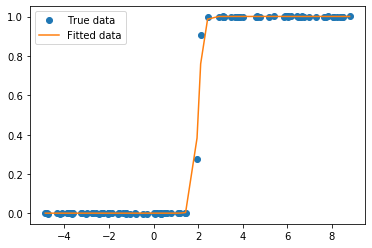

In [9]:
# plot the prediction vs true
# your code here
plt.plot(step_df_sort.x,step_df_sort.y,'o',label='True data')
plt.plot(step_df_sort.x,y_pre,label='Fitted data')
plt.legend()

</span></div><div class='alert alert-block alert-danger'><b>Note:</b><span style = 'color:black'> Make sure your submission passes all assert statements we've provided in this notebook.</span></div></div>

In [10]:
### 1.1 Check that you have the requested variables
for var in ['sigmoid', 'forward_step', 'step_df' , 'one_hump_df' , 'two_hump_df']:
    assert var in globals(), f"Variable '{var}' does not exist!"

**1.2** Do the same for the **one hump** function data, this time using a hidden layer consisting of **two** nodes.


</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [113]:
### cs109Test(test1.2) ###
# ONE HUMP  - two nodes in hidden layer
# your code here
one_hump_df_sort=one_hump_df.sort_values('x')

y_pre = forward_step(one_hump_df_sort.x, np.array([[18,-12],[-40,75]]), 
                 np.array([[1],[1],[-1]]), one_hump_df_sort.y)[0]
loss_mse(step_df_sort.y.values.reshape(100,1),y_pre)


0.1786389193351812

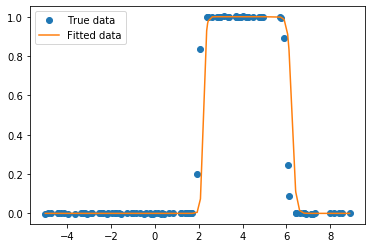

In [114]:
plt.plot(one_hump_df_sort.x,one_hump_df_sort.y,'o',label='True data')
plt.plot(one_hump_df_sort.x,y_pre,label='Fitted data')
plt.legend()
plt.show()

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>Q1.2
</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>points should not be scatterd, they should have been connected by a line.  
</span></div><div class='alert alert-block alert-danger'><b>Grade : </b><span style = 'color:black'>-1</span></div></div>

**1.3** Do the same for the **two humps** function data, but this time increase the number of hidden nodes to **four**.


</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

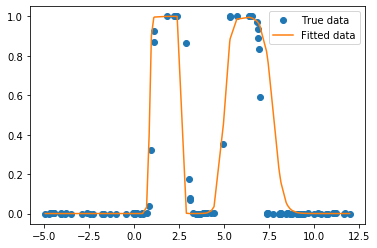

In [210]:
### cs109Test(test1.3) ###
# TWO HUMPS  - four nodes in hidden layer 
# your code here
two_hump_df_sort=two_hump_df.sort_values('x')
y_pre = forward_step(two_hump_df_sort.x, np.array([[6,-21,-4,28],[-30,18,31,-75]]), 
                 np.array([[1],[-1],[1],[-1],[0]]), two_hump_df_sort.y)[0]
loss_mse(step_df_sort.y.values.reshape(100,1),y_pre)

plt.plot(two_hump_df_sort.x,two_hump_df_sort.y,'o',label='True data')
plt.plot(two_hump_df_sort.x,y_pre,label='Fitted data')
plt.legend()
plt.show()

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>Q1.3
</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>weights not adjusted enought to have overlapping plots.  
</span></div><div class='alert alert-block alert-danger'><b>Grade : </b><span style = 'color:black'>-1</span></div></div>

**1.4** Choose the appropriate loss function and calculate and report the loss from all three cases. Derive the gradient of **the output layer's weights** for all three cases (step, one hump, and two humps). Use the weights for the hidden layers you found in the previous question and perform gradient descent on the weights of this layer (output layer). What are the optimized weight value and loss you obtained?

__NOTE: Only perform gradient descent for the output layer's weights (the ones that connect the hidden layer to the output layer)__

</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [213]:
### cs109Test (testLostFunctions) ###

# Loss function 
def L(y_pred, y):   
    """
    This function returns the appropriate loss given the predictions and actual values
    Inputs: 
        y_pred: A vector with the predicted y values 
        y:      A vector with the true y values 
    Output:
        loss:   A scalar for the loss"""
    # your code here 
    return np.mean((y-y_pred)**2)


<div class='alert alert-block text-center' style='Background-color:rgb(168, 166, 118)'><b>Question Auto graded </b></div><div class='alert alert-block' style='border-color:rgb(0, 0, 0); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>testLostFunctions</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Great Work!</span></div><div class='alert alert-block alert-danger'><b>Grade : </b><span style = 'color:black'>0</span></div></div>

</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [214]:
### cs109Test (test_der_L_WL1) ###

    
# derivative with respect to W1
def der_L_WL1(z, y_pred, y):
    """
    This function calculates the derivatives with respect to output weights
    Inputs: 
        y_pred: A vector with the predicted y values 
        y:      A vector with the true y values 
        z:      A vector with the values of the output layer 
    Output:
        ders:   A vector of partial derivatives 
    """
    # your code here 
    n=len(y)
    y_pred = y_pred.reshape(n,)
    y = y.reshape(n,)
    n_weight = z.shape[1]
    ders = []
    
    for i in range(n_weight):
        der_i=0
        for j in range(n):
            der_i += 2*(y_pred[j]-y[j])*y_pred[j]* (1-y_pred[j])*z[j,i]            
        der_i=der_i/n
        ders.append(der_i)  
           
    ders = np.array(ders)    
    
    
    # end of your code here
    return ders # returns vector of partial derivatives

</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [215]:
### cs109Test (test_GradientDescent) ###

# gradient descent 
def gradient_descent(steps, lr, WL0, WL1, X, y):
    """
    This function performs Gradient Descent
    Inputs: 
        steps: Number of steps
        lr: Learning Rate
        WL0: Layer 0 weights
        WL1: Layer 1 weights - Initital value
        X: X
        y: y
     Outputs:
        z1:  A vector with the final values of y (after steps steps)
        WL1_n: The final values of WL1 (after steps steps)
        errors: list of errors
    """
    
    
    # your code here 
    
    for step in range(steps):
        output, hidden = forward_step(X, WL0, WL1, y)
        der = der_L_WL1(hidden, output, y)
        WL1 = WL1 - lr * der.reshape(-1,1)
    z1 = output    
    errors =L(z1, y)
    WL1_n = WL1    
    
    # end of your code here
    return z1, WL1_n, errors

<div class='alert alert-block text-center' style='Background-color:rgb(168, 166, 118)'><b>Question Auto graded </b></div><div class='alert alert-block' style='border-color:rgb(0, 0, 0); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>test_GradientDescent</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Gradient Descent function fails to accept proper arguments and/or return desired output</span></div><div class='alert alert-block alert-danger'><b>Grade : </b><span style = 'color:black'>-2</span></div></div>

#### a) step function NN (a hidden layer with a single node)

In [219]:
step_df_sort.y

68    0.000912
88    0.000518
11   -0.001055
89    0.000687
78   -0.000976
        ...   
13    0.998576
57    0.998764
10    0.999504
24    0.999719
4     1.001807
Name: y, Length: 100, dtype: float64

In [220]:
# SINGLE STEP
# your code here 
gradient_descent(100, 0.01, np.array([[10],[-20]]), np.array([[1],[.001]]), step_df_sort.x, np.array(step_df_sort.y))

(array([[0.00103873],
        [0.00103873],
        [0.00103873],
        [0.00103873],
        [0.00103873],
        [0.00103873],
        [0.00103873],
        [0.00103873],
        [0.00103873],
        [0.00103873],
        [0.00103873],
        [0.00103873],
        [0.00103873],
        [0.00103873],
        [0.00103873],
        [0.00103873],
        [0.00103873],
        [0.00103873],
        [0.00103873],
        [0.00103873],
        [0.00103873],
        [0.00103873],
        [0.00103873],
        [0.00103873],
        [0.00103873],
        [0.00103873],
        [0.00103873],
        [0.00103873],
        [0.00103873],
        [0.00103873],
        [0.00103873],
        [0.00103873],
        [0.00103873],
        [0.00103873],
        [0.00103873],
        [0.00103873],
        [0.00103873],
        [0.00103873],
        [0.00103873],
        [0.00103873],
        [0.00103873],
        [0.00103873],
        [0.00103874],
        [0.00103874],
        [0.00103877],
        [0

#### b) one hump function NN (a hidden layer with two nodes)

In [221]:
# ONE HUMP
# your code here 
gradient_descent(100, 0.01,  np.array([[18,-12],[-40,75]]), np.array([[1],[1],[-1]]), step_df_sort.x, np.array(step_df_sort.y))

(array([[0.0116526 ],
        [0.0116526 ],
        [0.0116526 ],
        [0.0116526 ],
        [0.0116526 ],
        [0.0116526 ],
        [0.0116526 ],
        [0.0116526 ],
        [0.0116526 ],
        [0.0116526 ],
        [0.0116526 ],
        [0.0116526 ],
        [0.0116526 ],
        [0.0116526 ],
        [0.0116526 ],
        [0.0116526 ],
        [0.0116526 ],
        [0.0116526 ],
        [0.0116526 ],
        [0.0116526 ],
        [0.0116526 ],
        [0.0116526 ],
        [0.0116526 ],
        [0.0116526 ],
        [0.0116526 ],
        [0.0116526 ],
        [0.0116526 ],
        [0.0116526 ],
        [0.0116526 ],
        [0.0116526 ],
        [0.0116526 ],
        [0.0116526 ],
        [0.0116526 ],
        [0.0116526 ],
        [0.0116526 ],
        [0.0116526 ],
        [0.0116526 ],
        [0.0116526 ],
        [0.0116526 ],
        [0.0116526 ],
        [0.0116526 ],
        [0.0116526 ],
        [0.0116526 ],
        [0.0116526 ],
        [0.0116526 ],
        [0

#### c) two hump function NN (a hidden layer with 4 nodes)

In [222]:
# TWO HUMPS
# your code here 
gradient_descent(100, 0.01,  np.array([[6,-21,-4,28],[-30,18,31,-75]]), np.array([[1],[-1],[1],[-1],[0]]), step_df_sort.x, np.array(step_df_sort.y))

(array([[0.06271019],
        [0.06271019],
        [0.06271019],
        [0.06271019],
        [0.06271019],
        [0.06271019],
        [0.06271019],
        [0.06271019],
        [0.06271019],
        [0.06271019],
        [0.06271019],
        [0.06271019],
        [0.06271019],
        [0.06271019],
        [0.06271019],
        [0.06271019],
        [0.06271019],
        [0.06271019],
        [0.06271019],
        [0.06271019],
        [0.06271019],
        [0.06271019],
        [0.06271019],
        [0.06271019],
        [0.06271019],
        [0.06271019],
        [0.06271019],
        [0.06271019],
        [0.06271019],
        [0.06271019],
        [0.06271019],
        [0.06271019],
        [0.06271019],
        [0.06271019],
        [0.06271019],
        [0.06271019],
        [0.06271019],
        [0.06271019],
        [0.06271019],
        [0.06271019],
        [0.06271021],
        [0.06271026],
        [0.06271036],
        [0.06271063],
        [0.06271719],
        [0

<hr style='height:2pt'>
<div class='theme'> Neural Networks part B</div> 

Neural networks are, of course, a large and complex topic that cannot be covered in a single homework. Here, we'll focus on the key idea of ANNs: they are able to learn a mapping from example input data (of fixed size) to example output data (of fixed size). We'll also partially explore what patterns the neural network learns and how well neural networks generalize.

In this question we'll see if neural networks can learn a limited version of the [Fourier Transform.](https://en.wikipedia.org/wiki/Fourier_transform) (The Fourier Transform takes in values from some function and returns a set of sine and cosine functions which, when added together, approximate the original function.)

In symbols: $ \cal{F(s)} = \int_{-\infty}^\infty f(x)e^{- i xs}dx$. In words, the value of the transformed function at some point, $s$, is the value of an integral which measures, in some sense, how much the original $f(x)$ looks like a wave with a period of $s$. As an example, with $f(x) = 4cos(x) + sin(2x)$,  $\cal{F}(s)$ is 0 everywhere except at -2, -1, 1, and 2, mapping to the waves of period 1 and 1/2. The values at these points are linked to the magnitude of the waves, and their phases (roughly: sin waves versus cosine waves).

The only thing about the Fourier transform that matters for this p-set is this: a function goes in, and a re-written form in terms of sine and cosine comes out.

In our specific problem, we'll train a network to map from 1000 sample values from a function (equally spaced along 0 to 2$\pi$) to the four features of the sine and cosine waves that make up that function. Thus, the network is attempting to learn a mapping from a 1000-entry vector down to a 4-entry vector. Our `X_train` dataset's shape is $N x 1000$ and our `y_train` is $N x 4.$

Questions 2.1 and 2.2 will get you used to the format of the data. 

We'll use 6 data files in this question:
- `sinewaves_X_train.npy` and `sinewaves_y_train.npy`: a (10,000 x 1,000) and (10,000 x 4) training dataset. Examples were generated by randomly selecting a,b,c,d in the interval [0,1] and building the curve $a\sin(b\,x) + c\cos(d\,x)$
- `sinewaves_X_test.npy` and `sinewaves_y_test.npy`: a (2,000 x 1,000) and (2,000 x 4) test dataset, generated in the same way as the training data
- `sinewaves_X_extended_test` and `sinewaves_y_extended_test`: a (9 x 1,000) and (9 x 4) test dataset, testing whether the network can generalize beyond the training data (e.g. to negative values of $a$)

**These datasets are read in to their respective variables for you.**

<div class='exercise'> <b> Question 2 [25pts] </b> </div>
    
**2.1** Plot the first row of the `X_train` training data and visually verify that it is a sinusoidal curve.

**2.2** The first row of the `y_train` data is $[0.024, 0.533, 0.018, 0.558]$. Visually or numerically verify that the first row of X_train is 1000 equally-spaced samples in $[0,10\pi]$ from the function $f(x) = 0.024\sin(0.533\,x) + 0.018\cos(0.558\,x)$. This pattern (y_train is the true parameters of the curve in X_train) will always hold.

**2.3** Use `tf.keras` to build a fully-connected neural network:

**a:** Use `tf.keras.models.Sequential` and `tf.keras.layers.Dense` to build the fully-connected neural network. You can choose any number of layers and any number of nodes in each layer. 

**b:** Compile your model via the line `model.compile(loss='mean_absolute_error', optimizer='adam')` and display the `.summary()`. Explain why the first layer in your network has the indicated number of parameters.

**c:** Fit your model to the data for $50$ epochs using a batch size of $32$ and a validation split of $0.2$. You can train for longer if you wish -- the fit tends to improve over time.

**2.4** Use the `plot_predictions` function to plot the model's predictions on `X_test` to the true values in `y_test` (by default, it will only plot the first few rows). Report the model's overall loss on the test set. Comment on how well the model performs on this unseen data. Do you think it has accurately learned how to map from sample data to the coefficients that generated the data?

**2.5** Examine the model's performance on the 9 train/test pairs in the `extended_test` variables. Which examples does the model do well on, and which examples does it struggle with?

**2.6** Is there something that stands out about the difficult examples, especially with respect to the data the model was trained on? Did the model learn the mapping we had in mind? Would you say the model is overfit, underfit, or neither?

**Hint**:
- The Tensorflow 2.0 [`tf.keras` (here)](https://www.tensorflow.org/guide/keras) documentation and examples of a Sequential model are a good place to start.
- A strong model can achieve validation error of around 0.03 on this data and 0.02 is very good.

</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [17]:
### cs109default ### 
def plot_predictions(model, test_x, test_y, count=None):
    # Model - a tf.keras model that takes in (n,1000) training data and predicts (n,4) output data
    # test_x - a (n,1000) input dataset
    # test_y - a (n,4) output dataset
    # This function will plot the sine curves in the training data and those implied by the model's predictions.
    # It will also print the predicted and actual output values.
    
    #helper function that takes the n by 4 output and reverse-engineers 
    #the sine curves that output would create
    def y2x(y_data):
        #extract parameters
        a=y_data[:,0].reshape(-1,1)
        b=y_data[:,1].reshape(-1,1)
        c=y_data[:,2].reshape(-1,1)
        d=y_data[:,3].reshape(-1,1)

        #build the matching training data
        x_points = np.linspace(0,10*np.pi,1000)
        x_data = a*np.sin(np.outer(b,x_points)) + c*np.cos(np.outer(d,x_points))
        return x_data
    
    #if <20 examples, plot all. If more, just plot 5
    if count==None:
        if test_x.shape[0]>20:
            count=5
        else:
            count=test_x.shape[0]
    
    #build predictions
    predicted = model.predict(test_x)
    implied_x = y2x(predicted)
    for i in range(count):
        plt.plot(test_x[i,:],label='true')
        plt.plot(implied_x[i,:],label='predicted')
        plt.legend()
        plt.ylim(-2.1,2.1)
        plt.xlabel("x value")
        plt.xlabel("y value")
        plt.title("Curves using the Neural Network's Approximate Fourier Transform")
        plt.show()
        print("true:", test_y[i,:])
        print("predicted:", predicted[i,:])
    
    

</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [18]:
### cs109default ### 
X_train = np.load('data/sinewaves_X_train.npy')
y_train = np.load('data/sinewaves_y_train.npy')

X_test = np.load('data/sinewaves_X_test.npy')
y_test = np.load('data/sinewaves_y_test.npy')

X_extended_test = np.load('data/sinewaves_X_extended_test.npy')
y_extended_test = np.load('data/sinewaves_y_extended_test.npy')

## Answers:  

**2.1** Plot the first row of the `X_train` training data and visually verify that it is a sinusoidal curve.


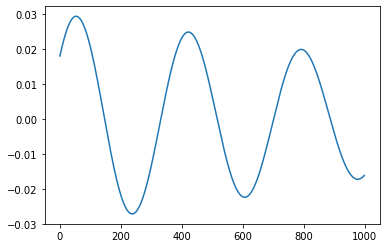

In [19]:
# your code here
plt.plot(X_train[0,])
plt.show()

It looks periodic and likely to be a sinusoidal curve.

**2.2** The first row of the `y_train` data is $[0.024, 0.533, 0.018, 0.558]$. Visually or numerically verify that the first row of X_train is 1000 equally-spaced samples in $[0,10\pi]$ from the function $f(x) = 0.024\sin(0.533\,x) + 0.018\cos(0.558\,x)$. This pattern (y_train is the true parameters of the curve in X_train) will always hold.


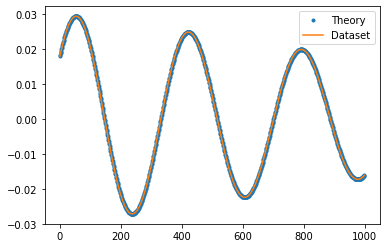

In [20]:
# your code here
x_sample=np.linspace(0, 10*np.pi, 1000)
y_calcu=0.024*np.sin(0.533*x_sample)+0.018*np.cos(0.558*x_sample)
plt.plot(y_calcu,'o',label='Theory',markersize=3)
plt.plot(X_train[0,],label='Dataset')
plt.legend()
plt.show()

The two data sequence coincide.

**2.3** Use `tf.keras` to build a fully-connected neural network:

**a:** Use `tf.keras.models.Sequential` and `tf.keras.layers.Dense` to build the fully-connected neural network. You can choose any number of layers and any number of nodes in each layer.

**b:** Compile your model via the line `model.compile(loss='mean_absolute_error', optimizer='adam')` and display the `.summary()`. Explain why the first layer in your network has the indicated number of parameters.

**c:** Fit your model to the data for $50$ epochs using a batch size of $32$ and a validation split of $0.2$. You can train for longer if you wish -- the fit tends to improve over time.


<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>Q2.3
</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>input shape only needs to be specified on the first layer
</span></div><div class='alert alert-block alert-danger'><b>Grade : </b><span style = 'color:black'>-1</span></div></div>

In [21]:
# build the fully-connected neural network
# your code here
model = tf.keras.models.Sequential(name='Model_2.3')
model.add(tf.keras.layers.Dense(100,activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dense(50,activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dense(30,activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dense(4,activation='linear'))



In [22]:
# Compile your model 
# your code here
model.compile(optimizer='adam',loss='mean_absolute_error')
model.summary()

Model: "Model_2.3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               100100    
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 124       
Total params: 106,804
Trainable params: 106,804
Non-trainable params: 0
_________________________________________________________________


*Your answer here*  
The first hidden layer has 30030 parameters to estimate, because the model has 1000 nodes in the input layer and 30 nodes in the first hidden layer. Counting the intercept, it has $(1000+1)\cdot 100=100100$ parameters. Similarly, it has $(100+1)\cdot 50=5050$ in the second hidden layer, $(50+1)\cdot 30=1530$ in the third hidden layer, and $(30+1)\cdot 4=124$ in the output layer.

In [23]:
# Fit your model 
# your code here
model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size= 32, verbose=2)


Train on 8000 samples, validate on 2000 samples
Epoch 1/50
8000/8000 - 2s - loss: 0.1610 - val_loss: 0.1183
Epoch 2/50
8000/8000 - 1s - loss: 0.0987 - val_loss: 0.0914
Epoch 3/50
8000/8000 - 1s - loss: 0.0841 - val_loss: 0.0789
Epoch 4/50
8000/8000 - 1s - loss: 0.0735 - val_loss: 0.0691
Epoch 5/50
8000/8000 - 1s - loss: 0.0664 - val_loss: 0.0647
Epoch 6/50
8000/8000 - 1s - loss: 0.0602 - val_loss: 0.0591
Epoch 7/50
8000/8000 - 1s - loss: 0.0573 - val_loss: 0.0539
Epoch 8/50
8000/8000 - 1s - loss: 0.0541 - val_loss: 0.0580
Epoch 9/50
8000/8000 - 1s - loss: 0.0530 - val_loss: 0.0513
Epoch 10/50
8000/8000 - 1s - loss: 0.0485 - val_loss: 0.0531
Epoch 11/50
8000/8000 - 1s - loss: 0.0481 - val_loss: 0.0473
Epoch 12/50
8000/8000 - 1s - loss: 0.0456 - val_loss: 0.0483
Epoch 13/50
8000/8000 - 1s - loss: 0.0439 - val_loss: 0.0440
Epoch 14/50
8000/8000 - 1s - loss: 0.0428 - val_loss: 0.0428
Epoch 15/50
8000/8000 - 1s - loss: 0.0404 - val_loss: 0.0407
Epoch 16/50
8000/8000 - 1s - loss: 0.0400 - va

**2.4** Use the `plot_predictions` function to plot the model's predictions on `X_test` to the true values in `y_test` (by default, it will only plot the first few rows). Report the model's overall loss on the test set. Comment on how well the model performs on this unseen data. Do you think it has accurately learned how to map from sample data to the coefficients that generated the data?


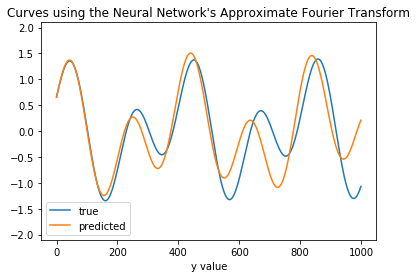

true: [0.86199664 0.98175913 0.65523998 0.4870337 ]
predicted: [0.85696304 1.018265   0.6549814  0.46275535]


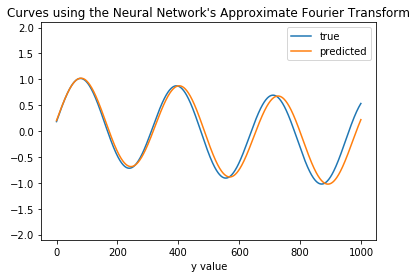

true: [0.8406355  0.63159555 0.18328701 0.11174618]
predicted: [0.8266027  0.617      0.20249715 0.10477942]


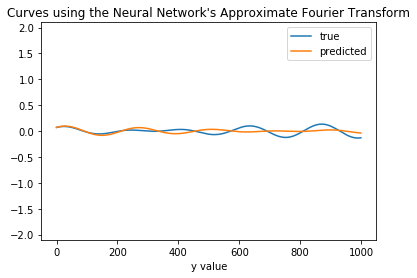

true: [0.06591224 0.75183886 0.06986143 0.91352303]
predicted: [0.06905341 0.78546715 0.07152063 0.85284936]


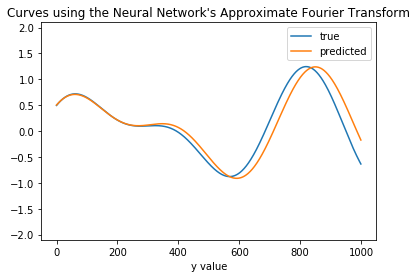

true: [0.75610725 0.30861152 0.49522059 0.48394499]
predicted: [0.73751795 0.29507086 0.5034448  0.46929395]


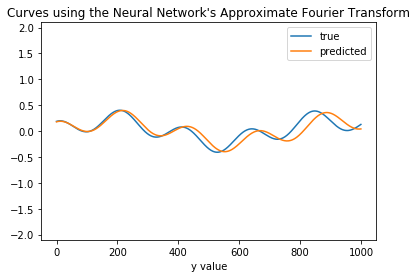

true: [0.2229353  0.27885697 0.18696198 0.94846283]
predicted: [0.22411048 0.259646   0.17884052 0.90873414]


In [24]:
# your code here
plot_predictions(model, X_test, y_test, count=None)

In [25]:
# model's overall loss
# your code here
pd.DataFrame(abs(model.predict(X_test)-y_test)).mean(axis=1).describe()

count    2000.000000
mean        0.027620
std         0.025841
min         0.001810
25%         0.013952
50%         0.020664
75%         0.030943
max         0.222833
dtype: float64

In [26]:
model.evaluate(X_test, y_test, verbose=0)

0.027620251446962358

*Your answer here*  
The overall loss function is about 0.027. The model is roughly good. It can handle situations that the wave of the curve is larger, but when $a$ and $c$ (true) are both very small, the slight difference between the predicted and true parameters can result in significant-looking difference in sinusoidal curve. 

**2.5** Examine the model's performance on the 9 train/test pairs in the `extended_test` variables. Which examples does the model do well on, and which examples does it struggle with?


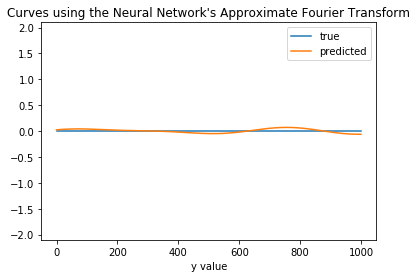

true: [0. 0. 0. 0.]
predicted: [0.04748295 0.33618075 0.02416371 0.52201855]


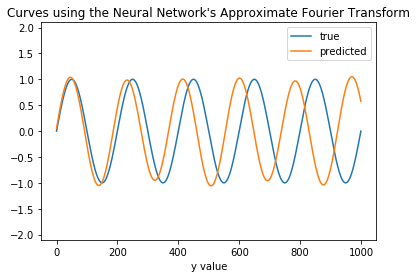

true: [1. 1. 0. 0.]
predicted: [1.0041616  1.0826395  0.05432113 0.60159874]


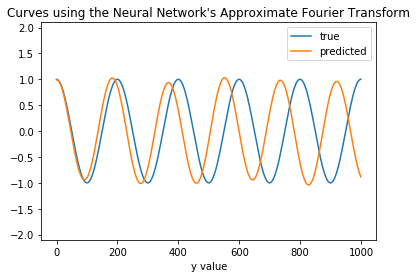

true: [0. 0. 1. 1.]
predicted: [0.05329797 0.41339484 0.9886791  1.0869071 ]


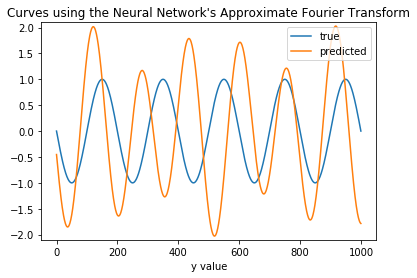

true: [-1.  1.  0.  0.]
predicted: [ 1.5770415  -1.2531315  -0.45297036  0.76573545]


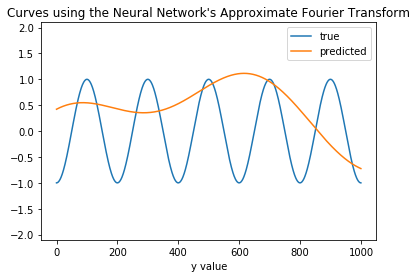

true: [ 0.  0. -1.  1.]
predicted: [0.8769323  0.11122981 0.42195144 0.30211896]


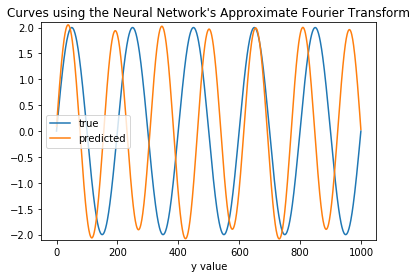

true: [2. 1. 0. 0.]
predicted: [1.9885938  1.2981627  0.09368856 0.6855364 ]


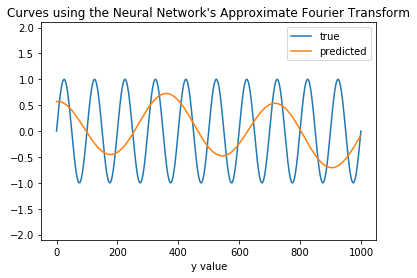

true: [1. 2. 0. 0.]
predicted: [0.1577267  0.14815894 0.5693673  0.55411637]


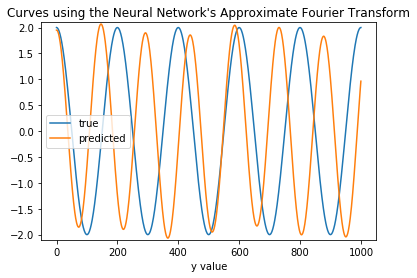

true: [0. 0. 2. 1.]
predicted: [0.12008125 0.3908184  1.9497348  1.3671062 ]


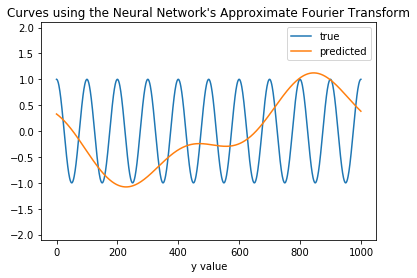

true: [0. 0. 1. 2.]
predicted: [ 0.81157434 -0.17062834  0.3301306   0.47941047]


In [27]:
# your code here
plot_predictions(model, X_extended_test, y_extended_test, count=None)

In [28]:
model.evaluate(X_extended_test, y_extended_test, verbose=0)

0.5667134523391724

*Your answer here*  
The model does well on true: (1,1,0,0) and (0,0,1,1), not too bad on (0,0,0,0), (2,1,0,0) and (0,0,2,1), and badly on (-1,1,0,0), (0,0,-1,1), (1,2,0,0) and (0,0,1,2).

**2.6** Is there something that stands out about the difficult examples, especially with respect to the data the model was trained on? Did the model learn the mapping we had in mind? Would you say the model is overfit, underfit, or neither?

**Hint**:
- The Tensorflow 2.0 [`tf.keras` (here)](https://www.tensorflow.org/guide/keras) documentation and examples of a Sequential model are a good place to start.
- A strong model can achieve validation error of around 0.03 on this data and 0.02 is very good.

In [29]:
pd.DataFrame(y_train).describe()

,0,1,2,3
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.501988,0.497651,0.500799,0.494677
std,0.289179,0.291927,0.287402,0.287070
min,0.000128,0.000139,0.000047,0.000051
25%,0.251623,0.239095,0.254517,0.247989
50%,0.506676,0.504151,0.499648,0.493205
75%,0.752637,0.749297,0.750759,0.738573
max,0.999560,0.999944,0.999989,0.999707


In [30]:
pd.DataFrame(abs(y_train)).mean(axis=1).describe()

count    10000.000000
mean         0.498779
std          0.143814
min          0.030367
25%          0.397405
50%          0.498684
75%          0.599728
max          0.928818
dtype: float64

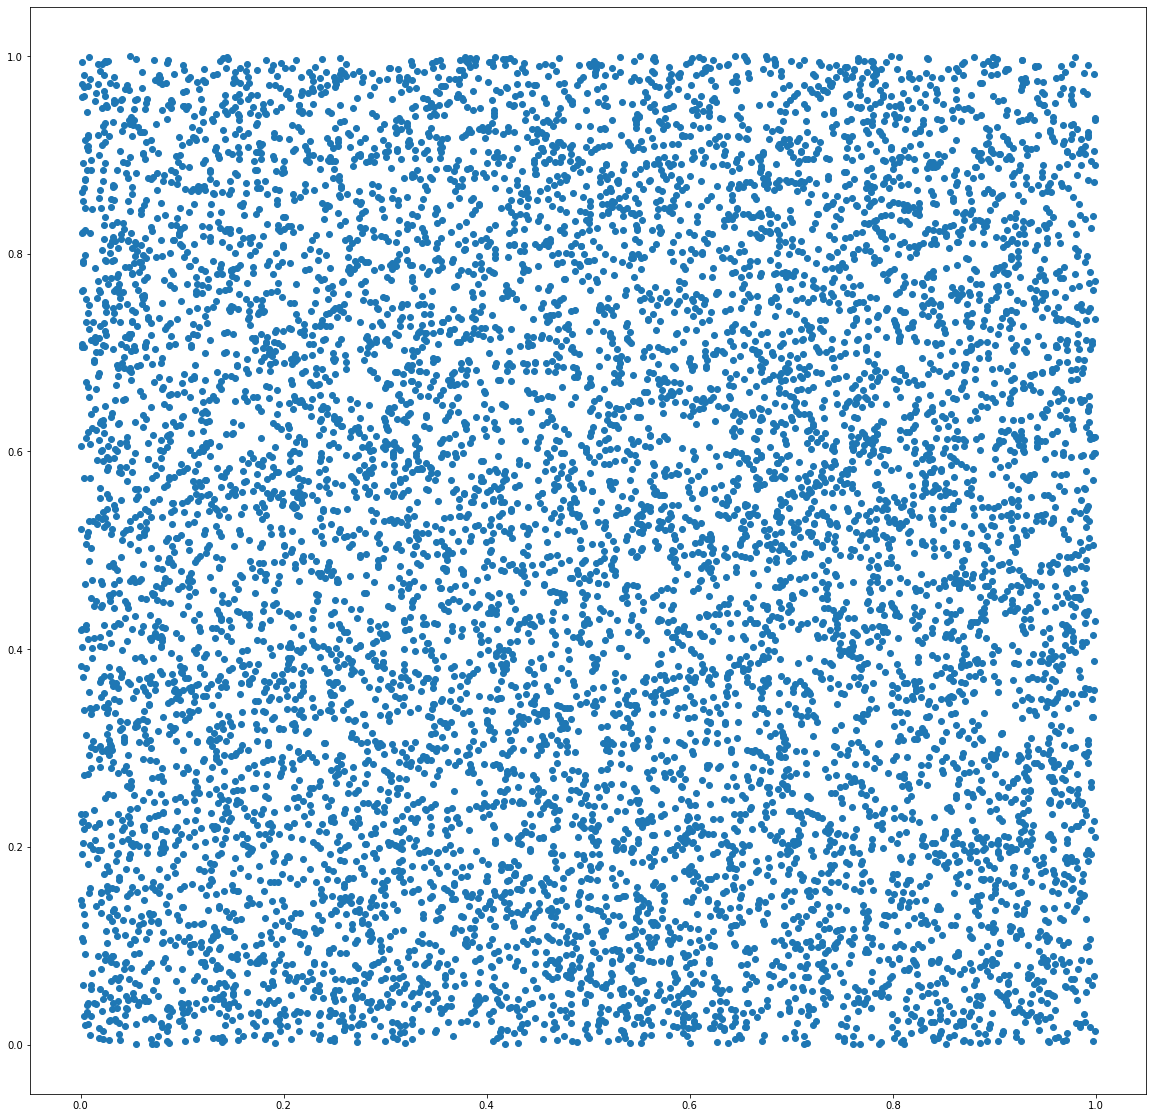

In [31]:
plt.figure(figsize=(20,20))
plt.plot(pd.DataFrame(y_train)[0], pd.DataFrame(y_train)[1],'o')
plt.show()

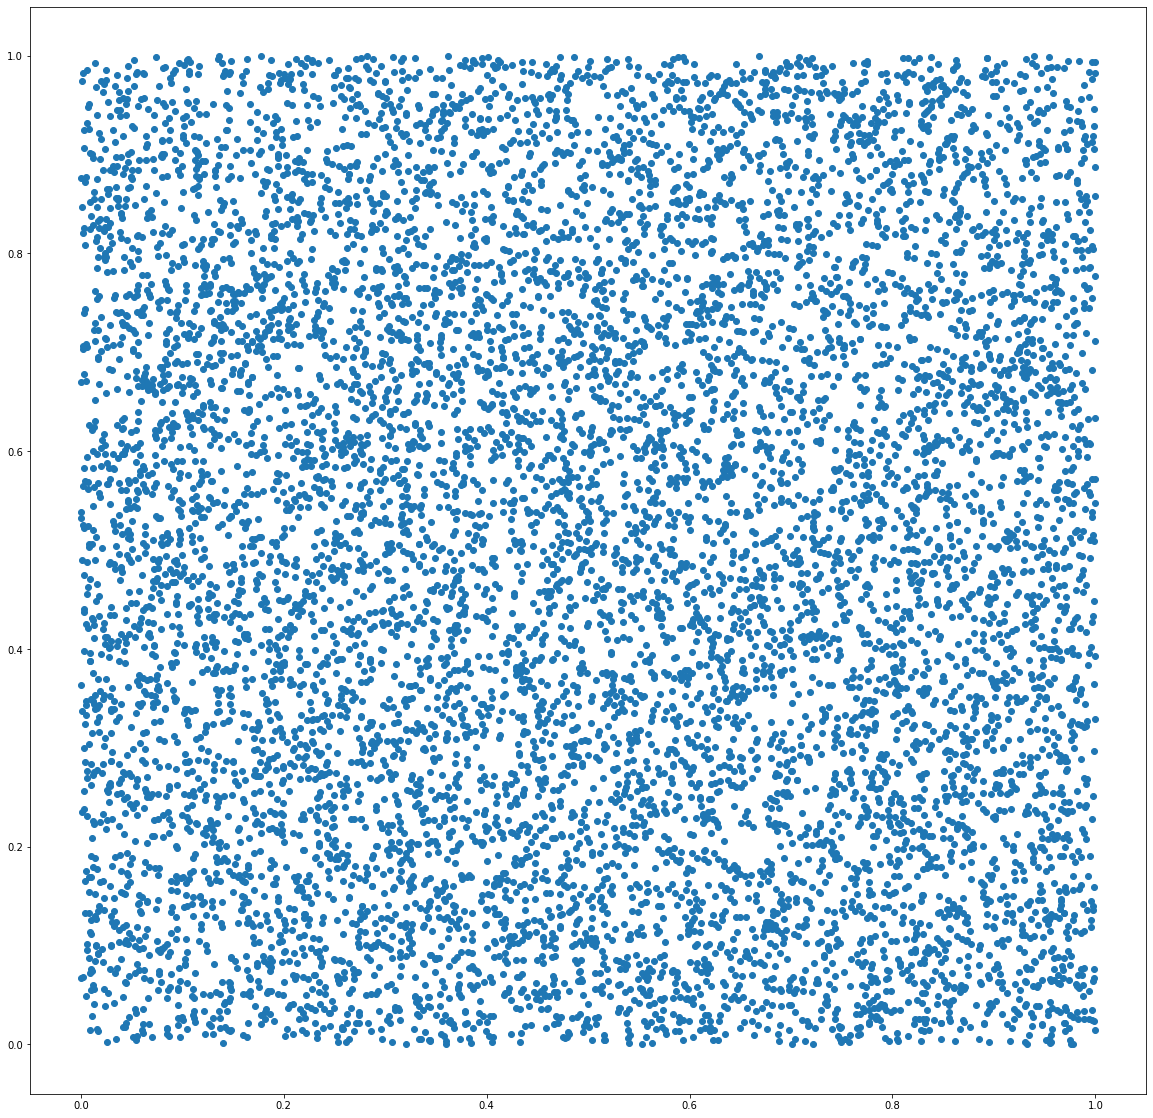

In [32]:
plt.figure(figsize=(20,20))
plt.plot(pd.DataFrame(y_train)[2], pd.DataFrame(y_train)[3],'o')
plt.show()

*Your answer here*  
The extended examples are sepcial that they are basically degenerated to one component of trigonometric function. The model has 4 nodes in the output layer so in such situations it will not be suitable. The training data are relatively uniformly distributed, so the model is not affected by such situations while training. Overall, the model can discover the mapping we want. Neither overfitting nor underfitting. 

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>Q2.6
</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>did not arrive to the right conclusion
</span></div><div class='alert alert-block alert-danger'><b>Grade : </b><span style = 'color:black'>-4</span></div></div>

<hr style='height:2pt'>

<div class='theme'> Regularizing Neural Networks </div>

In this problem set, we have already explored how ANNs are able to learn a mapping from example input data (of fixed size) to example output data (of fixed size), and how well the neural network can generalize. In this problem, we focus on issues of overfitting and regularization in neural networks.

As we have explained in class, ANNs can be prone to overfitting, where they learn specific patterns present in the training data, but the patterns do not generalize to new data.

There are several methods used to improve ANN generalization. One approach is to use an architecture just barely wide/deep enough to fit the data. The idea here is that smaller networks are less expressive and thus less able to overfit the data.

However, it is difficult to know a priori the correct size of the ANN, and it is computationally costly to hunt for the correct size. Given this, other methodologies are used to prevent overfitting and improve ANNs' generalizability. These methodologies, like other techniques that combat overfitting, fall under the umbrella of regularization.

In this problem, you are asked to regularize a network given to you below.
    
For this problem, we will be working with a modified version of MNIST dataset (MNIST CS109, MNIST: Modified National Institute of Standards and Technology database), which is a large database of handwritten digits and commonly used for training various image processing systems. This dataset consists of 60,000 28x28 grayscale images of the ten digits, along with a test set of 10,000 images. For pedagogical simplicity, we will only use the digits labeled `4` and `9`, and we want to use a total of 1600 samples for training (this includes the data you will use for validation).

We have selected the samples for you and the dataset is available at https://www.kaggle.com/c/cs109a. You have to create an account on Kaggle and join competition via https://www.kaggle.com/t/ca16b77c5feb4cbabb0d8cf63d9a7212. This is a limited participation competition. Please do not share link.  

`x_train_mnist_cs109.csv` is our training dataset, last column is the target column. Class 0 means sample is handwritten digit 4 and class 1 means sample is handwritten digit 9.  784 columns correspond to 28x28 image size. 


`x_test_mnist_cs109.csv` has  structure similar to `x_train_mnist_cs109.csv` with no labels. `x_test_mnist_cs109.csv` has 3200  samples. Kaggle leaderboard scores are accuracy scores calculated on this test set.  

`sample_submission.csv` is the format that kaggle will accept.



<div class='exercise'> <b> Question 3 [25 pts] </b> </div>
    
**3.1**  Download data from the competition page. You should have three files `x_train_mnist_cs109.csv`, `x_test_mnist_cs109.csv` and `sample_submission.csv`. We will utilize `x_test_mnist_cs109.csv` in 3.3.  Load the data and use the matplotlib function `imshow` to display a handwritten 4 and a handwritten 9.

**3.2** **Overfit an ANN:** Build a fully-connected network (FCN) using `tensorflow.keras` and assign it to a variable called `model_overfit`: 

1. Number of hidden layers: 3
2. Nodes per hidden layer: 100,100,100
2. Activation function: reLU 
3. Loss function: binary_crossentropy
4. Output unit: Sigmoid 
5. Optimizer: adam (use the defaults; no other tuning)
6. Epochs: no more than 2,000
7. Batch size: 128
8. Validation size: .3

This ANN trained on the dataset you built here will overfit to the training set. Plot the training accuracy and validation accuracy as a function of epochs and explain how you can tell it is overfitting. 


**3.3** Create an ANN that doesn't overfit and compete on Kaggle.

Keep the architecture above as is. In other words, keep the number of layers, number of nodes, activation function,  loss function and output unit the same. You can change the number of epochs (max 2000), batch size, optimizer, and of course, add elements that can help to regularize (e.g., drop out, L2 norm, etc.). You can also do data augmentation. 



- 3.3.1 Save your model's training accuracy as a variable called `kaggle_train_acc` and make sure it prints in the assert cell provided
- 3.3.2 Additionally, display model summary, training and validation accuracy and loss (yes, the training accuracy should be displayed again here).
- 3.3.3 Print the difference between training and validation accuracy and loss.
- 3.3.4 Plot the training accuracy and validation accuracy as a function of epochs.
- 3.3.5 Save the model using `model.save(filename)` and **submit it on canvas along with your notebook**. Code on how to save your model is provided below.
- 3.3.6 **Submit your Kaggle name that you have used on the leaderboard. *We can't give you credit without this* . Enter it in the code cell below that starts with ### cs109Test(Kaggle_name) ###.**




**RULES:**

- **Please do not manually label your submissions.** In other words the labels should be the outcome of your model. 

- **No CNNs  allowed for this competition. 

- **No external data are allowed, please only use the x_train_mnist_cs109.csv for training the models.**

- Do not create multiple accounts on Kaggle.


**Grading:** (all accuracies are in percentages)

S1: (Model overfit training accuracy - Model overfit validation accuracy)  => How much are you overfitting 3.2  ?

S2: (Good model training accuracy - Good model average on Kaggle)  => How much are you overfitting on kaggle 3.3

S3: (min (0, Good model training accuracy - Model overfit training accuracy )) => Your good model accuracy must be higher than model overfit. 

score = S1 - S2 + S3

1. score > 1 : 4pt
2. score > 1.5-2.0 : 8pts
3. score > 2.0: 12pts
4. 3pt extra to the top 10 students




## Answers

**3.1**  Download data from the competition page. You should have three files `x_train_mnist_cs109.csv`, `x_test_mnist_cs109.csv` and `sample_submission.csv`. We will utilize `x_test_mnist_cs109.csv` in 3.3.  Load the data and use the matplotlib function `imshow` to display a handwritten 4 and a handwritten 9.


In [33]:
# your code here
x_train_mnist = pd.read_csv('data/x_train_mnist_cs109.csv')
x_test_mnist = pd.read_csv('data/x_test_mnist_cs109.csv')
sample_submission_mnist = pd.read_csv('data/sample_submission.csv')

In [35]:
x_train_mnist.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,...,1,0,98,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,...,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Example of 9

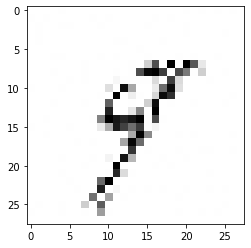

In [36]:
plt.imshow(x_train_mnist.loc[0].values[0:-1].reshape(28,28),cmap=plt.cm.binary)
plt.show()

### Example of 4

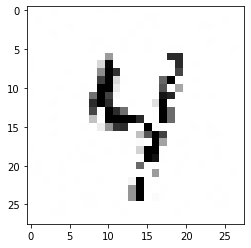

In [37]:
plt.imshow(x_train_mnist.loc[2].values[0:-1].reshape(28,28),cmap=plt.cm.binary)
plt.show()

**3.2** **Overfit an ANN:** Build a fully-connected network (FCN) using `tensorflow.keras` and assign it to a variable called `model_overfit`:

1. Number of hidden layers: 3
2. Nodes per hidden layer: 100,100,100
2. Activation function: reLU
3. Loss function: binary_crossentropy
4. Output unit: Sigmoid
5. Optimizer: adam (use the defaults; no other tuning)
6. Epochs: no more than 2,000
7. Batch size: 128
8. Validation size: .3

This ANN trained on the dataset you built here will overfit to the training set. Plot the training accuracy and validation accuracy as a function of epochs and explain how you can tell it is overfitting.



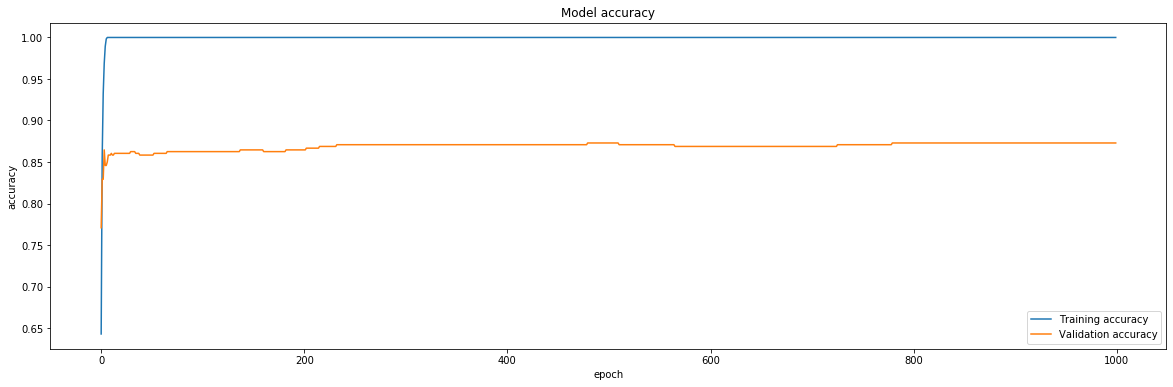

In [38]:
# your code here
model_overfit=tf.keras.models.Sequential(name='Model_3.2')
model_overfit.add(tf.keras.layers.Dense(100,activation='relu'))
model_overfit.add(tf.keras.layers.Dense(100,activation='relu'))
model_overfit.add(tf.keras.layers.Dense(100,activation='relu'))
model_overfit.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model_overfit.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
y_train_mnist=np.array(x_train_mnist['784'])
x_train_array=np.array(x_train_mnist.drop(['784'],axis=1))
history = model_overfit.fit(x_train_array, y_train_mnist, 
                              validation_split=0.3, epochs=1000, batch_size=128, verbose=0)

fig, ax = plt.subplots(1,1, figsize=(20,6))

ax.plot(history.history['accuracy'],label='Training accuracy')
ax.plot(history.history['val_accuracy'],label='Validation accuracy')
ax.set_title('Model accuracy')
ax.set_ylabel('accuracy')
ax.set_xlabel('epoch')
ax.legend()



*Your answer here*  
As the number of epoch goes up, the training accuracy keep raising until 1, while the validation accuracy tsops increasing earlier. It indicates overfitting.

**3.3** Create an ANN that doesn't overfit and compete on Kaggle.

Keep the architecture above as is. In other words, keep the number of layers, number of nodes, activation function,  loss function and output unit the same. You can change the number of epochs (max 2000), batch size, optimizer, and of course, add elements that can help to regularize (e.g., drop out, L2 norm, etc.). You can also do data augmentation.


- 3.3.1 Save your model's training accuracy as a variable called `kaggle_train_acc` and make sure it prints in the assert cell provided
- 3.3.2 Additionally, display model summary, training and validation accuracy and loss (yes, the training accuracy should be displayed again here).
- 3.3.3 Print the difference between training and validation accuracy and loss.
- 3.3.4 Plot the training accuracy and validation accuracy as a function of epochs.
- 3.3.5 Save the model using `model.save(filename)` and **submit it on canvas along with your notebook**. Code on how to save your model is provided below.
- 3.3.6 **Submit your Kaggle name that you have used on the leaderboard. *We can't give you credit without this* . Enter it in the code cell below that starts with ### cs109Test(Kaggle_name) ###.**




**RULES:**

- **Please do not manually label your submissions.** In other words the labels should be the outcome of your model.

- **No CNNs  allowed for this competition.

- **No external data are allowed, please only use the x_train_mnist_cs109.csv for training the models.**

- Do not create multiple accounts on Kaggle.


**Grading:** (all accuracies are in percentages)

S1: (Model overfit training accuracy - Model overfit validation accuracy)  => How much are you overfitting 3.2  ?

S2: (Good model training accuracy - Good model average on Kaggle)  => How much are you overfitting on kaggle 3.3

S3: (min (0, Good model training accuracy - Model overfit training accuracy )) => Your good model accuracy must be higher than model overfit.

score = S1 - S2 + S3

1. score > 1 : 4pt
2. score > 1.5-2.0 : 8pts
3. score > 2.0: 12pts
4. 3pt extra to the top 10 students



In [39]:
# your code here
kernel_weight=0.05
bias_weight=0.05
model_kaggle=tf.keras.models.Sequential(name='Model_3.3')
model_kaggle.add(tf.keras.layers.Dense(100,activation='relu'))
model_kaggle.add(tf.keras.layers.Dense(100,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(kernel_weight), 
                                    bias_regularizer=tf.keras.regularizers.l2(bias_weight)))
model_kaggle.add(tf.keras.layers.Dense(1,activation='sigmoid'))



model_kaggle.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])
y_train_mnist=np.array(x_train_mnist['784'])
x_train_array=np.array(x_train_mnist.drop(['784'],axis=1))
history = model_kaggle.fit(x_train_array, y_train_mnist, 
                              validation_split=0.3, epochs=1000, batch_size=16, verbose=0)


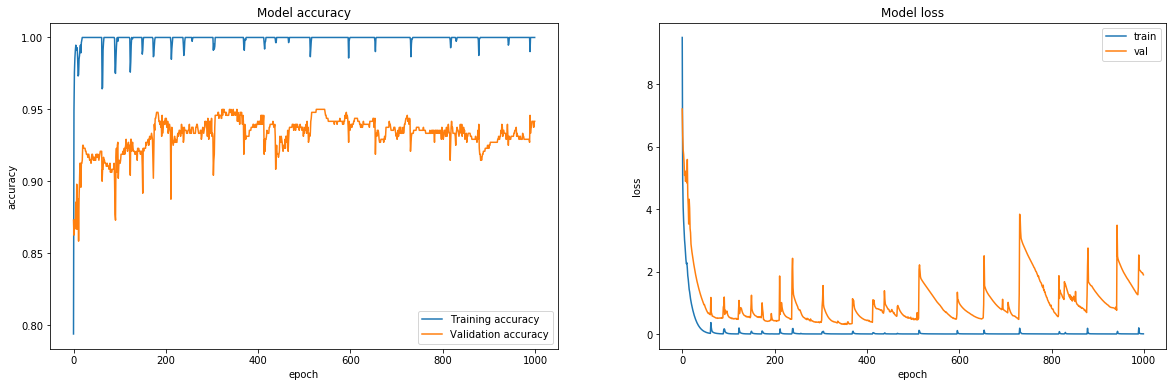

In [40]:
fig, ax = plt.subplots(1,2, figsize=(20,6))

ax[0].plot(history.history['accuracy'],label='Training accuracy')
ax[0].plot(history.history['val_accuracy'],label='Validation accuracy')
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend()

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'val'], loc='best')
plt.show()

In [41]:
model_kaggle.summary()

Model: "Model_3.3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              multiple                  78500     
_________________________________________________________________
dense_9 (Dense)              multiple                  10100     
_________________________________________________________________
dense_10 (Dense)             multiple                  101       
Total params: 88,701
Trainable params: 88,701
Non-trainable params: 0
_________________________________________________________________


In [42]:
# your code here
kaggle_train_loss,kaggle_train_acc = model_kaggle.evaluate(x_train_array, y_train_mnist, verbose=0)
print('Training accuracy: ',kaggle_train_acc)
print('Training loss: ',kaggle_train_loss)
print('Validation accuracy: ',history.history['val_accuracy'][-1])
print('Validation loss: ',history.history['val_loss'][-1],'\n')
print('Difference of training and validation accuracy: ',kaggle_train_acc-history.history['val_accuracy'][-1])
print('Difference of training and validation loss: ',kaggle_train_loss-history.history['val_loss'][-1])

Training accuracy:  0.9825
Training loss:  0.571252870047465
Validation accuracy:  0.94166666
Validation loss:  1.894745819736272 

Difference of training and validation accuracy:  0.040833354
Difference of training and validation loss:  -1.323492949688807


In [43]:
# your code here
submission=sample_submission_mnist.copy()
submission['category']=(model_kaggle.predict(np.array(x_test_mnist))>0.5)*1
submission.to_csv('submission2.csv',index=False)

In [44]:
### Print your Kaggle model's train accuracy
assert 'kaggle_train_acc' in globals(), f"Variable 'kaggle_train_acc' does not exist!"
print('Kaggle Train Accuracy: {}'.format(kaggle_train_acc))

Kaggle Train Accuracy: 0.9825000166893005


In [45]:
model=model_kaggle

In [46]:
### cs109default ### 
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


### cs109test (Kaggle_name) ###

**Enter your Kaggle Leaderboard name as a string in the cell below**

**(No credit without the name!)**

In [47]:
### cs109Test(Kaggle_name) ###
# Enter your Kaggle Leaderboard name exactly as it appears
# (No name == no credit!)

KAGGLE_NAME = 'hanshaoling'

<div class='alert alert-block text-center' style='Background-color:rgb(213, 130, 88)'><b>Kaggle</b></div><div class='alert alert-block' style='border-color:rgb(0, 0, 0); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>Kaggle_name</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Results for Kaggle Name "hanshaoling":
S1 = overfit_acc - overfit_val_acc = 0.9806 - 0.9354 = 0.0452
S2 = kaggle_train_acc - kaggle_average = 0.9825 - 0.9450 = 0.0375
S3 = min(0, kaggle_train_acc - overfit_acc) = min(0, 0.9825 - 0.9806) = min(0, 0.0019) = 0.0000
score = S1 - S2 + S3 =  0.0452 - 0.0375 + 0.0000 = 0.0077
This earned you 0 points (+3 points as baseline)
You ranked #198 on Kaggle</span></div><div class='alert alert-block alert-danger'><b>Grade : </b><span style = 'color:black'>-12</span></div></div>

In [48]:
### Check that you entered your Kaggle name!
assert 'KAGGLE_NAME' in globals(), f"Variable 'KAGGLE_NAME' does not exist!"
assert KAGGLE_NAME != '', f"You forgot to enter your KAGGLE_NAME"
print(f'Kaggle Leaderboard Name: {KAGGLE_NAME}')

Kaggle Leaderboard Name: hanshaoling


---

<div class='exercise'><b> Question 4: Model interpretations </b> </div>

In this problem you will be building and interpreting models to predict whether or not a flight was delayed for its arrival based on features that could be measured as the flight takes off.  The included variables are:

**ARRIVAL_DELAY**: the difference between scheduled arrival and actual arrival, in minutes (positive is late, negative is early).

**DISTANCE**: the distance between arrival and departure airports, in miles.

**SCHEDULED_TIME**: the amount of time the flight was scheduled to take.

**MONTH**: the month the flight took off, 1 = January, 2 = February, etc.

**SCHED_DEP_HOUR**: the scheduled departure time (the hour of the day).

**SCHED_ARR_HOUR**: the scheduled arrival time (the hour of the day).

**FLIGHT_COUNT**: the number of flights flying out of that airport before noon on a typical day.

**DAY_OF_WEEK**: the day of the week, 1 = Monday, 2 = Tuesday, etc.

**ORIGIN_AIRPORT**: the airport the flight took off from.

**DESTINATION_AIRPORT**: the airport the flight was scheduled to land at.

For the airport codes, see: https://www.bts.gov/topics/airlines-and-airports/world-airport-codes

This problem steps you through fitting several models (starting simple, tuning a  and building up to complex), evaluate their accuracies, and then interpret the relationships of the predictors in the models via feature importance measures and through plotting their predications.

*Note: the observations were stratified sampled so that roughly half of the observations were delayed and half of the observations were not delayed.


**4.1**  Read in the dataset `flights.csv`. Create a variable `DELAY_OR_NOT` that denotes whether `ARRIVAL_DELAY` is greater than or equal to 15 minutes (the FAA and BTS define a flight as delayed only if it arrives 15 minutes late or more). Turn the following predictors into dummies: `['ORIGIN_AIRPORT','DESTINATION_AIRPORT']`, and then split into train and test (80-20 split) using `train_test_split` with a random state of `109`.  Print out the dimensions of the resulting train and test `flights_train` and `flights_test` data frames.

**4.2** Fit two tree based models: one with `max_depth = 20` (call it `tree20`) and one with a `best_depth` that is chosen via 5-fold cross-validation (call it `tree_best`) using all predictors.  Evaluate these two models via AUC on both train and test.  Print out `tree20_train_auc`, `tree20_test_auc`, `tree_best_train_auc`, and `tree_best_test_auc` (make sure they are well-labeled in the print out; see primer below).

**4.3** Interpret your tree based models.  Provide a plot with the **relative** variable importance of the 10 most important predictors, `top_predictors` in each of the two models.  Interpret (i) which variables are clearly most important and (ii) compare to each other to describe how the two models differ and/or agree with which variables matter. 

**4.4** Fit an artifical neural network model (call it `NN_model`) using all predictors.  Use a dense 2-layer feed-forward network (1 input, 1 hidden) with 15 nodes in each layer.  Evaluate the model on both train and test, and print out the resulting `NN_model_train_auc`, `NN_model_train_auc`.

**4.5** Fit a classification tree with `max_depth=20` on the predictions from your `NN_model`.  Call it `dec_tree_NN`.  Draw the first 3 layers of the tree and interpret what predictors seem most important in `dec_tree_NN` from the top of this tree.

**4.6** Use your `dec_tree_NN` to measure **relative** variable importance in your `NN_model` and provide a plot for the 10 most important predictors.  How do these compare to those from 4.3 and the drawn tree in 4.5?  Discuss in 2-4 sentences.

**4.7** Interpret the results of your `NN_model` via plotting predicted probabilities of delay vs. `SCHED_DEP_HOUR` when all the other variables are set to their means/modes.  Interpret what you see in 2-4 sentences.

## Answers

**4.1**  Read in the dataset `flights.csv`. Create a variable `DELAY_OR_NOT` that denotes whether `ARRIVAL_DELAY` is greater than or equal to 15 minutes (the FAA and BTS define a flight as delayed only if it arrives 15 minutes late or more). Turn the following predictors into dummies: `['ORIGIN_AIRPORT','DESTINATION_AIRPORT']`, and then split into train and test (80-20 split) using `train_test_split` with a random state of `109`.  Print out the dimensions of the resulting train and test `flights_train` and `flights_test` data frames.


</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [49]:
### cs109Test (test_4.1) ### 
# your code here 
flights=pd.read_csv('data/flights.csv')
flights['DELAY_OR_NOT']=(flights['ARRIVAL_DELAY']>=15)*1
dummies_columns=['ORIGIN_AIRPORT','DESTINATION_AIRPORT']
flights=pd.get_dummies(flights, columns=dummies_columns, drop_first=False)

flights_train, flights_test =train_test_split(flights, test_size=0.2, random_state = 109)
print(flights_train.shape)
print(flights_test.shape)

(8000, 812)
(2000, 812)


</span></div><div class='alert alert-block alert-danger'><b>Note:</b><span style = 'color:black'> Make sure your submission passes all assert statements we've provided in this notebook.</span></div></div>

In [50]:
### 4.1 Check that you have the requested variables
for var in ['flights_train', 'flights_test']:
    assert var in globals(), f"Variable '{var}' does not exist!"

**4.2** Fit two tree based models: one with `max_depth = 20` (call it `tree20`) and one with a `best_depth` that is chosen via 5-fold cross-validation (call it `tree_best`) using all predictors.  Evaluate these two models via AUC on both train and test.  Print out `tree20_train_auc`, `tree20_test_auc`, `tree_best_train_auc`, and `tree_best_test_auc` (make sure they are well-labeled in the print out; see primer below).


</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

</span></div><div class='alert alert-block alert-danger'><b>Note:</b><span style = 'color:black'> Make sure your submission passes all assert statements we've provided in this notebook.</span></div></div>

In [51]:
### cs109Test (test_4.2a) ### 
# your code here
x_flights_train=flights_train.drop(['DELAY_OR_NOT','ARRIVAL_DELAY'],axis = 1)
y_flights_train=flights_train['DELAY_OR_NOT']
x_flights_test=flights_test.drop(['DELAY_OR_NOT','ARRIVAL_DELAY'],axis = 1)
y_flights_test=flights_test['DELAY_OR_NOT']

tree20 = DecisionTreeClassifier(max_depth = 20)
tree20.fit(x_flights_train,y_flights_train)
# end of your code here

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [52]:
### cs109Test (test_4.2b) ### 
# Decision Tree Classifier
# your code here 
mean_CV_acc = {}
all_CV_acc = {}
tree_depth_start, tree_depth_end, steps = 1, 30, 1
for i in range(tree_depth_start, tree_depth_end, steps):
    model = DecisionTreeClassifier(max_depth=i)
    score = cross_val_score(estimator=model, X=x_flights_train, y=y_flights_train, cv=5, n_jobs=-1)
    all_CV_acc[i] = score
    mean_CV_acc[i] = score.mean()

mean_CV_acc

best_depth = sorted(mean_CV_acc, key=mean_CV_acc.get, reverse=True)[0]
print("The best depth was found to be:", best_depth)

tree_best=DecisionTreeClassifier(max_depth = 5)
tree_best.fit(x_flights_train,y_flights_train)
# end of your code here
### 4.2 Check that you have the requested variables
for var in ['tree20', 'tree_best', 'best_depth']:
    assert var in globals(), f"Variable '{var}' does not exist!"

The best depth was found to be: 5


</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [53]:
### cs109Test (test_4.2c) ### 
# primer to print: 
# print("tree20_train_auc:", roc_auc_score(y_train, y_hat))
# your code here 
y_train_hat_20=tree20.predict(x_flights_train)
print("tree20_train_auc:", roc_auc_score(y_flights_train, y_train_hat_20))

y_test_hat_20=tree20.predict(x_flights_test)
print("tree20_test_auc:", roc_auc_score(y_flights_test, y_test_hat_20))

y_train_hat_best=tree_best.predict(x_flights_train)
print("tree_best_train_auc:", roc_auc_score(y_flights_train, y_train_hat_best))

y_test_hat_best=tree_best.predict(x_flights_test)
print("tree_best_test_auc:", roc_auc_score(y_flights_test, y_test_hat_best))

tree20_train_auc: 0.9126662038500474
tree20_test_auc: 0.6911682205139846
tree_best_train_auc: 0.7346465254742537
tree_best_test_auc: 0.7231325081925738


**4.3** Interpret your tree based models.  Provide a plot with the **relative** variable importance of the 10 most important predictors, `top_predictors` in each of the two models.  Interpret (i) which variables are clearly most important and (ii) compare to each other to describe how the two models differ and/or agree with which variables matter.


</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

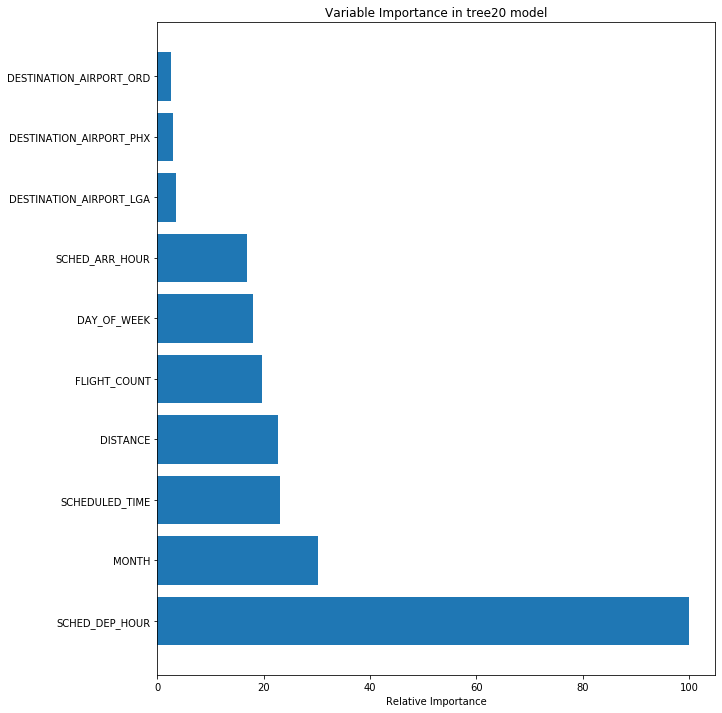

In [104]:
### cs109Test (test_4.3) ### 
#feature importance
# your code here 
feature_importance = tree20.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(-feature_importance)[:10]
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(10,12))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x_flights_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance in tree20 model')
plt.show()

top_predictors_20=x_flights_train.columns[sorted_idx]

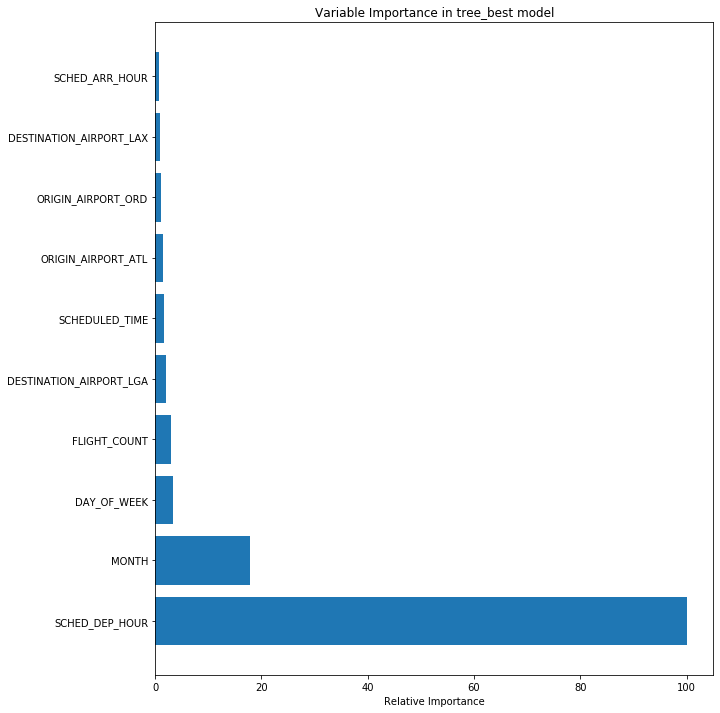

In [105]:
feature_importance = tree_best.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(-feature_importance)[:10]
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(10,12))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x_flights_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance in tree_best model')
plt.show()
top_predictors_best=x_flights_train.columns[sorted_idx]

In [56]:
top_predictors_20

Index(['SCHED_DEP_HOUR', 'MONTH', 'SCHEDULED_TIME', 'DISTANCE', 'FLIGHT_COUNT', 'DAY_OF_WEEK', 'SCHED_ARR_HOUR', 'DESTINATION_AIRPORT_LGA', 'DESTINATION_AIRPORT_PHX', 'DESTINATION_AIRPORT_ORD'], dtype='object')

In [57]:
top_predictors_best

Index(['SCHED_DEP_HOUR', 'MONTH', 'DAY_OF_WEEK', 'FLIGHT_COUNT', 'DESTINATION_AIRPORT_LGA', 'SCHEDULED_TIME', 'ORIGIN_AIRPORT_ATL', 'ORIGIN_AIRPORT_ORD', 'DESTINATION_AIRPORT_LAX', 'SCHED_ARR_HOUR'], dtype='object')

In [58]:
set(top_predictors_20)&set(top_predictors_best)

{'DAY_OF_WEEK',
 'DESTINATION_AIRPORT_LGA',
 'FLIGHT_COUNT',
 'MONTH',
 'SCHEDULED_TIME',
 'SCHED_ARR_HOUR',
 'SCHED_DEP_HOUR'}

*Your answer here*  
The scheduled departure hour and month are most important in both models. Both models rank scheduled departure hour, month, day of week, destination LGA (LaGuardia airport in NY), flight count, scheduled arrival hour and scheduled time as top predictors. 

**4.4** Fit an artifical neural network model (call it `NN_model`) using all predictors.  Use a dense 2-layer feed-forward network (1 input, 1 hidden) with 15 nodes in each layer.  Evaluate the model on both train and test, and print out the resulting `NN_model_train_auc`, `NN_model_train_auc`.


</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>Q4.3
</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>first layer should define the input layer
</span></div><div class='alert alert-block alert-danger'><b>Grade : </b><span style = 'color:black'>-1</span></div></div>

In [59]:
### cs109Test (test_4.4) ### 
# build the NN 
# your code here
NN_model=tf.keras.models.Sequential(name='Model_4.4')
NN_model.add(tf.keras.layers.Dense(15,activation='relu'))
NN_model.add(tf.keras.layers.Dense(15,activation='relu'))
NN_model.add(tf.keras.layers.Dense(1,activation='sigmoid'))


</span></div><div class='alert alert-block alert-danger'><b>Note:</b><span style = 'color:black'> Make sure your submission passes all assert statements we've provided in this notebook.</span></div></div>

In [61]:
### 4.4 Check that you have the requested variables
for var in ['NN_model']:
    assert var in globals(), f"Variable '{var}' does not exist!"

In [62]:
# compile it and run it
# your code here 
NN_model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
history=NN_model.fit(np.array(x_flights_train),np.array(y_flights_train), validation_split=0.2, epochs=50, batch_size= 16, verbose=2)

Train on 6400 samples, validate on 1600 samples
Epoch 1/50
6400/6400 - 2s - loss: 0.8872 - accuracy: 0.5939 - val_loss: 0.7070 - val_accuracy: 0.5844
Epoch 2/50
6400/6400 - 1s - loss: 0.6622 - accuracy: 0.6463 - val_loss: 0.6053 - val_accuracy: 0.6725
Epoch 3/50
6400/6400 - 1s - loss: 0.6471 - accuracy: 0.6623 - val_loss: 0.6272 - val_accuracy: 0.6550
Epoch 4/50
6400/6400 - 1s - loss: 0.6449 - accuracy: 0.6647 - val_loss: 0.5991 - val_accuracy: 0.6919
Epoch 5/50
6400/6400 - 1s - loss: 0.6039 - accuracy: 0.6875 - val_loss: 0.5964 - val_accuracy: 0.7006
Epoch 6/50
6400/6400 - 1s - loss: 0.6185 - accuracy: 0.6844 - val_loss: 0.5757 - val_accuracy: 0.7150
Epoch 7/50
6400/6400 - 1s - loss: 0.6121 - accuracy: 0.6867 - val_loss: 0.5778 - val_accuracy: 0.6994
Epoch 8/50
6400/6400 - 1s - loss: 0.5795 - accuracy: 0.7092 - val_loss: 0.5772 - val_accuracy: 0.7006
Epoch 9/50
6400/6400 - 1s - loss: 0.5867 - accuracy: 0.6984 - val_loss: 0.8070 - val_accuracy: 0.5994
Epoch 10/50
6400/6400 - 1s - loss:

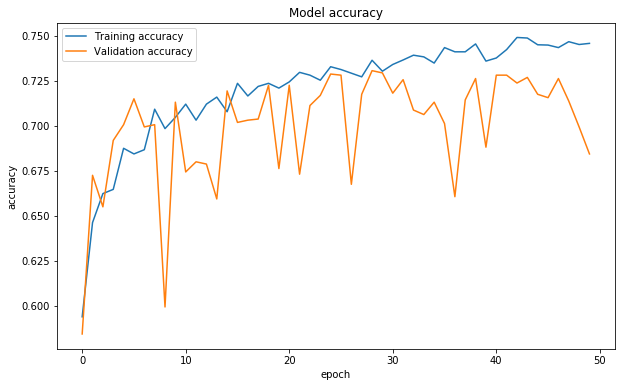

In [63]:
# plot train and val acc as  a function of epochs
# your code here
fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(history.history['accuracy'],label='Training accuracy')
ax.plot(history.history['val_accuracy'],label='Validation accuracy')
ax.set_title('Model accuracy')
ax.set_ylabel('accuracy')
ax.set_xlabel('epoch')
ax.legend()
plt.show()

</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [64]:
### cs109Test (test_4.4b) ### 
# primer to print: 
# print("NN_model_train_auc:", roc_auc_score(y_train, y_hat))
# your code here 
y_train_hat_NN=(NN_model.predict(np.array(x_flights_train))>0.5)*1
y_test_hat_NN=(NN_model.predict(np.array(x_flights_test)>0.5))*1
print("NN_model_train_auc:", roc_auc_score(y_flights_train, y_train_hat_NN))
print("NN_model_test_auc:", roc_auc_score(y_flights_test, y_test_hat_NN))

NN_model_train_auc: 0.7142721741844359
NN_model_test_auc: 0.6321181890637015


**4.5** Fit a classification tree with `max_depth=20` on the predictions from your `NN_model`.  Call it `dec_tree_NN`.  Draw the first 3 layers of the tree and interpret what predictors seem most important in `dec_tree_NN` from the top of this tree.


</span></div><div class='alert alert-block alert-danger'><b>WARNING!:</b><span style = 'color:black'> Do not delete any of the `### cs109Test() ###` comment lines!</span></div></div>

In [67]:
### cs109Test (test_4.5) ### 
# your code here
dec_tree_NN=DecisionTreeClassifier(max_depth = 20)
dec_tree_NN.fit(x_flights_train,y_train_hat_NN)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

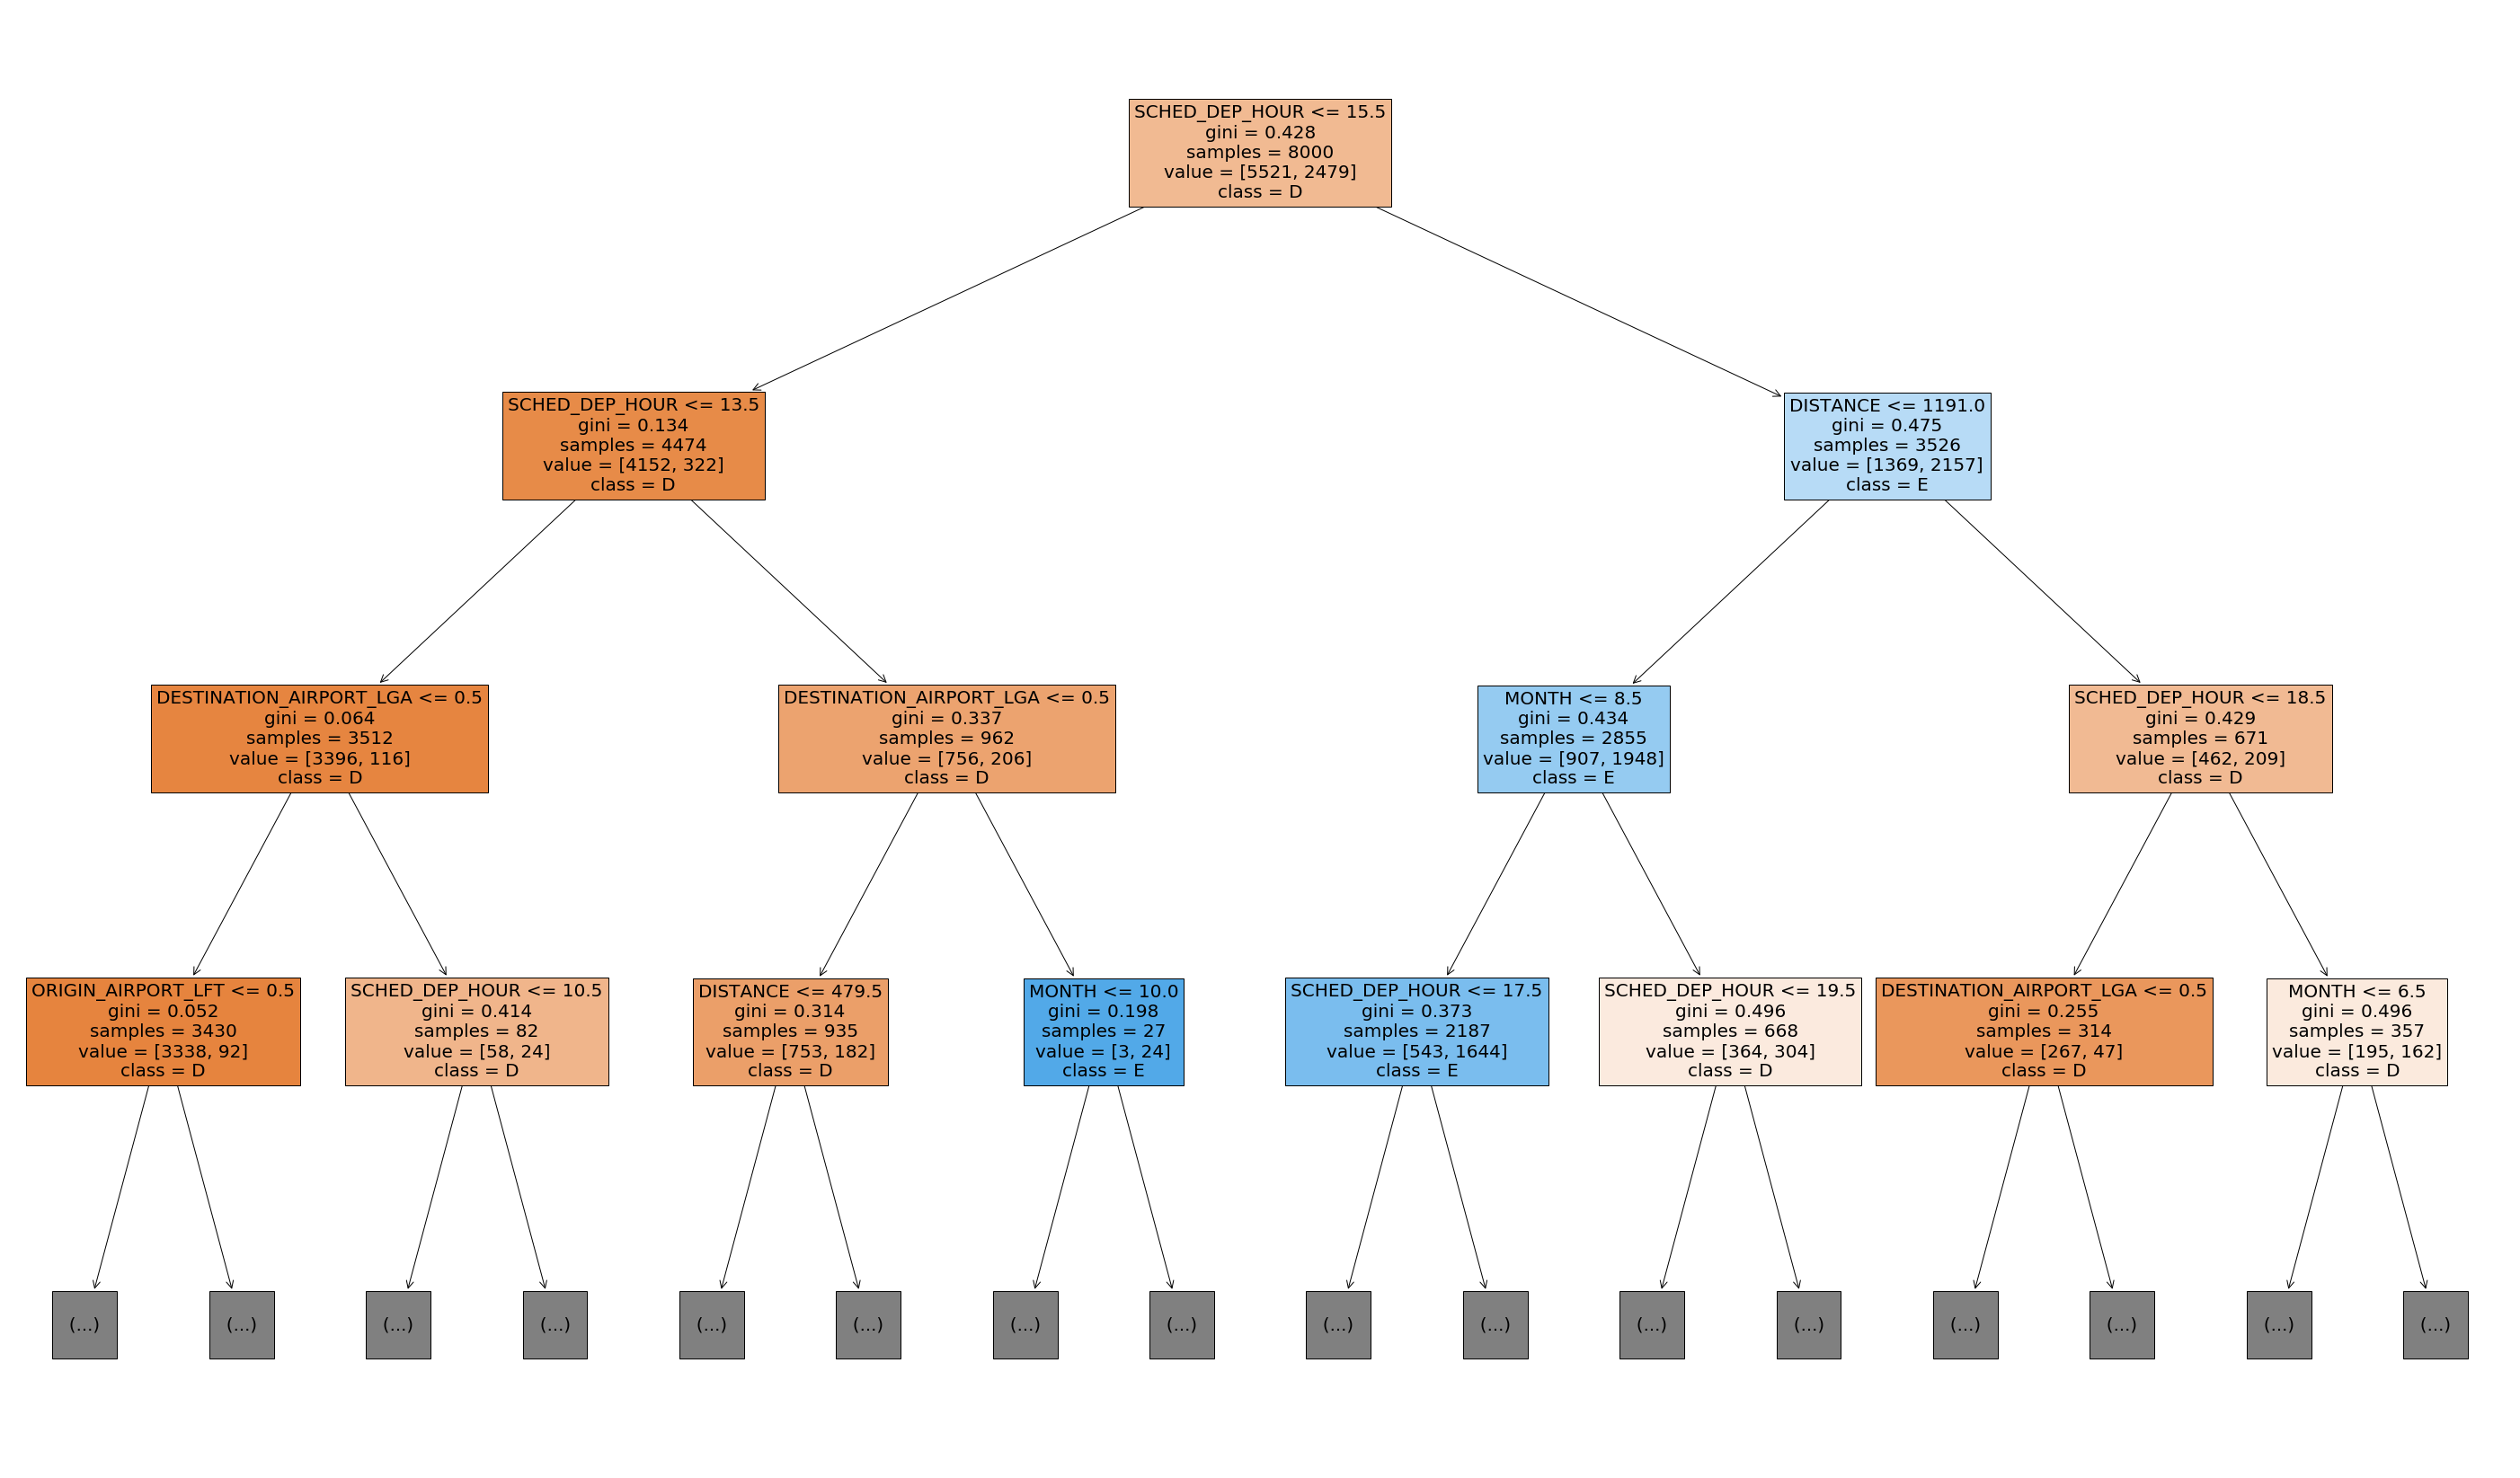

In [100]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,30))
plot_tree(dec_tree_NN, filled=True,max_depth=3,fontsize=20,feature_names=x_flights_train.columns,  
                                class_names=y_flights_train.name)
plt.show()

It seems that again scheduled departure hour is the most important predictor.

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>Q4.5
</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>not a comprehensive analysis on the predictor importance. 
</span></div><div class='alert alert-block alert-danger'><b>Grade : </b><span style = 'color:black'>-0.5</span></div></div>

</span></div><div class='alert alert-block alert-danger'><b>Note:</b><span style = 'color:black'> Make sure your submission passes all assert statements we've provided in this notebook.</span></div></div>

In [99]:
### 4.5 Check that you have the requested variables
for var in ['dec_tree_NN']:
    assert var in globals(), f"Variable '{var}' does not exist!"

**4.6** Use your `dec_tree_NN` to measure **relative** variable importance in your `NN_model` and provide a plot for the 10 most important predictors.  How do these compare to those from 4.3 and the drawn tree in 4.5?  Discuss in 2-4 sentences.


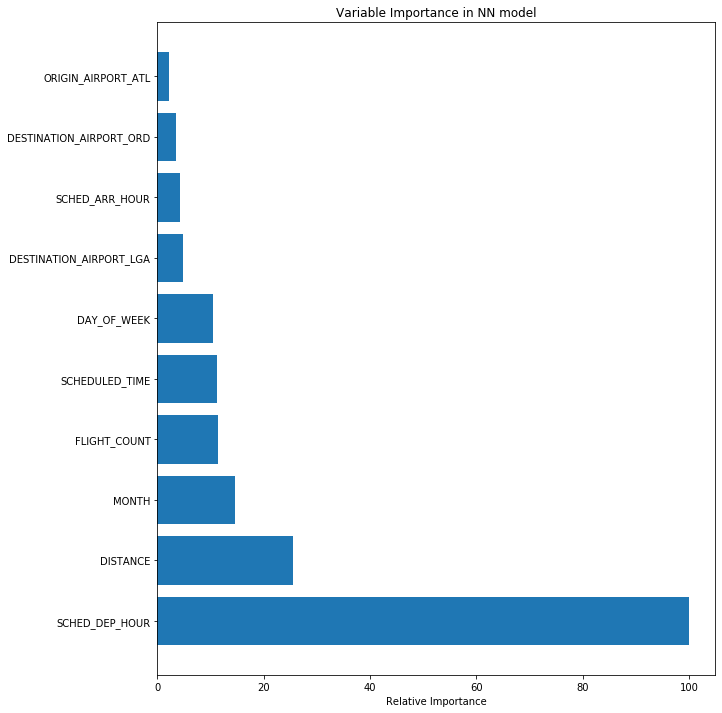

In [106]:
# your code here 
feature_importance = dec_tree_NN.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(-feature_importance)[:10]
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(10,12))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x_flights_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance in NN model')
plt.show()

top_predictors_NN=x_flights_train.columns[sorted_idx]

In [107]:
# your code here
set(top_predictors_NN)&set(top_predictors_20)&set(set(top_predictors_best))

{'DAY_OF_WEEK',
 'DESTINATION_AIRPORT_LGA',
 'FLIGHT_COUNT',
 'MONTH',
 'SCHEDULED_TIME',
 'SCHED_ARR_HOUR',
 'SCHED_DEP_HOUR'}

The TOP 10 predictors are pretty common in all models. Also, all predictors in the first 3 layers of the NN_tree model (except origin airport LFT, Lafayette) are among these TOP 10. It is convincing that these common predictors are indeed critical.

**4.7** Interpret the results of your `NN_model` via plotting predicted probabilities of delay vs. `SCHED_DEP_HOUR` when all the other variables are set to their means/modes.  Interpret what you see in 2-4 sentences.

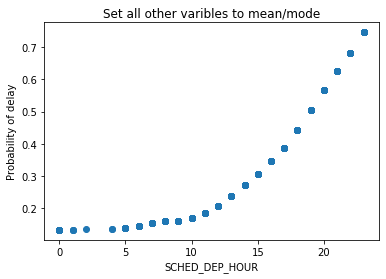

In [198]:
# your code here
flights_typical_train=flights_train.copy()
max=0
max_column=None
for column in flights.columns[414:]:
    if flights_train[column].mean()>max:
        max=flights_train[column].mean()
        max_column=column

for column in flights.columns[414:]:
    if column != max_column:
        flights_typical_train[column]=0
    else:
        flights_typical_train[column]=1

max=0
max_column=None
for column in flights.columns[9:414]:
    if flights_train[column].mean()>max:
        max=flights_train[column].mean()
        max_column=column

for column in flights.columns[9:414]:
    if column != max_column:
        flights_typical_train[column]=0
    else:
        flights_typical_train[column]=1

for column in flights.columns[[1,2,3,5,6,7]]:
    flights_typical_train[column]=flights_train[column].mean()
    
x_typical_train=flights_typical_train.drop(['DELAY_OR_NOT','ARRIVAL_DELAY'],axis = 1)
y_typical_train=flights_typical_train['DELAY_OR_NOT']

plt.plot(x_typical_train['SCHED_DEP_HOUR'],NN_model.predict_proba(np.array(x_typical_train)),'o')
plt.xlabel('SCHED_DEP_HOUR')
plt.ylabel('Probability of delay')
plt.title('Set all other varibles to mean/mode')
plt.show()


*Your answer here*

It means that given all other variables constant, the probability of delap will just be sigmoid function of scheduled departure hour. This is determined by the activation function the model uses.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Checked by: Yajaira Gonzalez
</footer>